# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data 
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [2]:
# Read the study results
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [4]:
# Checking the number of mice.
len(combined_data["Mouse ID"].unique())

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data.loc[combined_data["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
index_data = combined_data.set_index("Mouse ID")
index_data = index_data.drop(index = "g989")
index_data

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
f932,0,45.000000,0,Ketapril,Male,15,29
g107,0,45.000000,0,Ketapril,Female,2,29
a457,0,45.000000,0,Ketapril,Female,11,30
c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...
r944,45,41.581521,2,Capomulin,Male,12,25
u364,45,31.023923,3,Capomulin,Male,18,17
p438,45,61.433892,1,Ceftamin,Female,11,26


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_data = index_data.reset_index(drop=False)
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumor_volume = clean_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor_volume = clean_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_tumor_volume = clean_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_tumor_volume = clean_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumor_volume = clean_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
stats_table = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                                   "Median Tumor Volume": median_tumor_volume,
                                  "Tumor Volume Variance": var_tumor_volume,
                                  "Tumor Volume Std. Dev.": std_tumor_volume,
                                  "Tumor Volume Std. Err.": sem_tumor_volume})
stats_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
clean_data.groupby('Drug Regimen').aggregate([np.mean, np.median, np.var, np.std, st.stats.sem])["Tumor Volume (mm3)"]

/var/folders/dr/z3ytzzvs5lq9vdlj1fmfmvy80000gn/T/ipykernel_49979/826443676.py:4: DeprecationWarning: Please use `sem` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  clean_data.groupby('Drug Regimen').aggregate([np.mean, np.median, np.var, np.std, st.stats.sem])["Tumor Volume (mm3)"]
/var/folders/dr/z3ytzzvs5lq9vdlj1fmfmvy80000gn/T/ipykernel_49979/826443676.py:4: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  clean_data.groupby('Drug Regimen').aggregate([np.mean, np.median, np.var, np.std, st.stats.sem])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [11]:
# Get total numbers of mice by drug
drug_data = clean_data.groupby("Drug Regimen").count()['Tumor Volume (mm3)'].sort_values(ascending=False)
drug_data

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Tumor Volume (mm3), dtype: int64

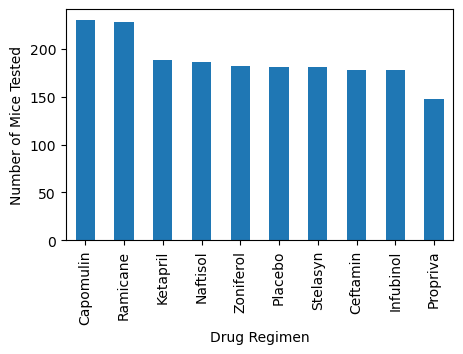

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
figure1 = drug_data.plot(kind="bar", figsize=(5,3),
                                xlabel="Drug Regimen",
                                ylabel="Number of Mice Tested")
plt.show()

Text(0, 0.5, 'Number of Mice Tested')

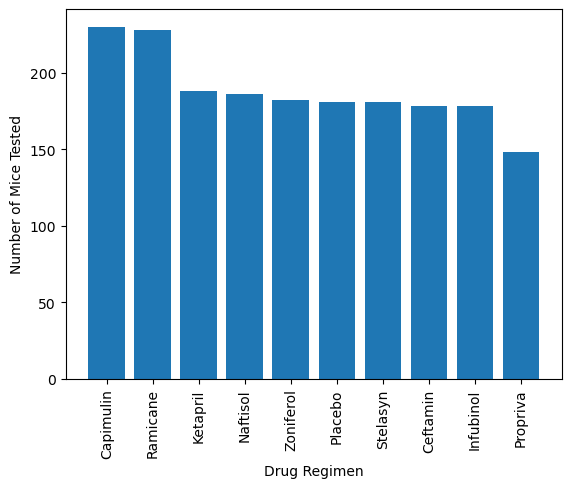

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug = ["Capimulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn",
       "Ceftamin", "Infubinol", "Propriva"]

x_axis = np.arange(0, len(drug_data))
plt.bar(x_axis, drug_data, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug, rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

Text(0, 0.5, 'Sex')

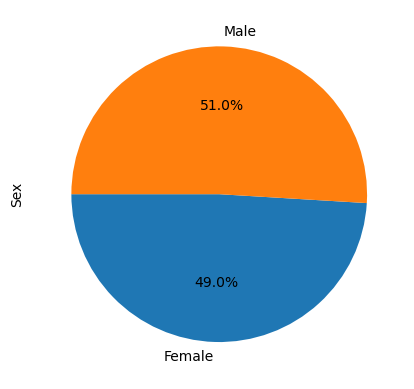

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = clean_data.groupby("Sex").count()["Mouse ID"]
sex = ["Male", "Female"]
sex_pie = sex_data.plot(kind="pie", autopct="%1.1f%%", startangle=180)
plt.ylabel("Sex")

Text(0, 0.5, 'Sex')

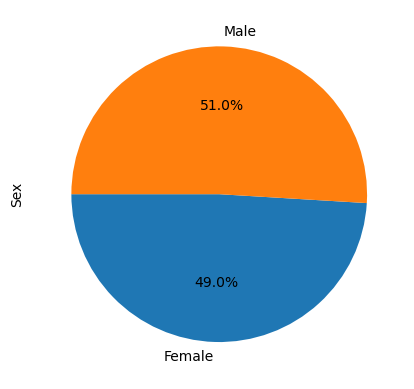

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
plt.pie(sex_data, labels=labels, autopct="%1.1f%%", startangle=180)
plt.ylabel("Sex")


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint, clean_data, on=["Mouse ID", "Timepoint"], how="left")
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_merged_df = merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

    # Add subset 
    tumor_vol.append(tumor_vol_merged_df)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_merged_df.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol_merged_df.loc[(tumor_vol_merged_df < lower_bound) | (tumor_vol_merged_df > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

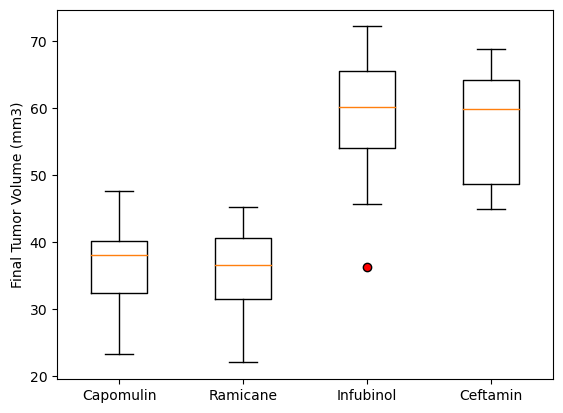

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fill_color = dict(markerfacecolor='red')
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol, labels = treatments, flierprops = fill_color)
plt.ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

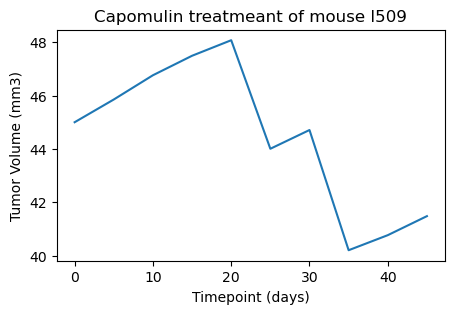

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
from scipy import stats

# Pick a mouse treated with Capomulin
capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", :]
mouse_l509 = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509", :]

# Assign x and y values to timepoints and tumor volumes of mouse l509
timepoint = mouse_l509["Timepoint"]
tumor_vol_l509 = mouse_l509["Tumor Volume (mm3)"]

# Plot the line
plt.figure(figsize=(5,3))
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(timepoint, tumor_vol_l509,"-")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Average Tumor Volume (mm3)')

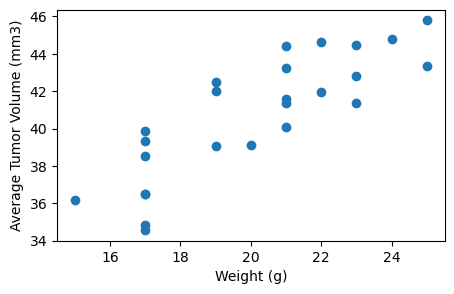

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Assign x and y values to mouse weight and tumor volume
avg_tumor_vol = capomulin_df.groupby(['Mouse ID']).mean()["Tumor Volume (mm3)"]
avg_mouse_weight = capomulin_df.groupby(['Mouse ID']).mean()["Weight (g)"]

# Generate the scatter plot
plt.figure(figsize=(5,3))
plt.scatter(avg_mouse_weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


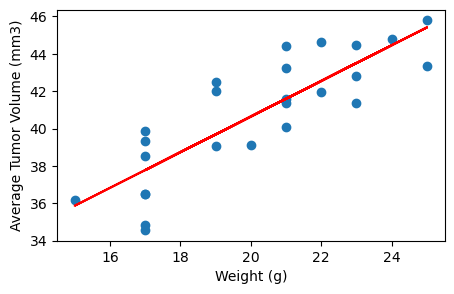

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation between mouse weight and the average tumor volume is 
      {round(st.pearsonr(avg_mouse_weight,avg_tumor_vol)[0],2)}")

# Perform a linear regression on mouse weight versus average tumor volume
cap_slope, cap_int, cap_r, cap_p, cap_std_err = stats.linregress(avg_mouse_weight, avg_tumor_vol)

# Create equation of line to calculate predicted number of petrol-electric cars
cap_fit = cap_slope * avg_mouse_weight + cap_int

# Plot the linear model on top of scatter plot 
plt.figure(figsize=(5,3))
plt.scatter(avg_mouse_weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(avg_mouse_weight, cap_fit,"-", color='r')
plt.show()